<a href="https://colab.research.google.com/github/kawanakaiku/colab-archive/blob/main/dist_konomi_t2pwg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ■ これってなあに？
 - [馬場このみさん](https://idollist.idolmaster-official.jp/search/detail/30028)（アイドルマスターミリオンライブ！）が、おしゃべりしてくれる音声合成ツールです。
  - Input: 日本語テキスト
  - Output: 馬場このみさんが読み上げてくれた音声（wav形式・ダウンロード可能）
  - 問い合わせ先：[@Anko_Fori](https://twitter.com/Anko_FORi) (ツール作成者twitter)

 -【**特徴**】
  - 発音・アクセントを陽に考慮した、口語的な読み上げ。
  - **読み上げ音声のアクセント等を、手動で修正することが可能**。
  - 3種類の学習済みモデルが利用可能。
  - 実装には、Tacotron2 + Parallel WaveGAN ([ttslearn](https://github.com/r9y9/ttslearn)を利用)を用いています。

 - 【[**サンプルボイス**](https://drive.google.com/file/d/1pv_L99X8bTAzgKcvNM4rx18Ah6yJpV9H/view?usp=sharing)】（学習済みモデル：03_data4000_2）
  - [潜入！スパイシスターズ！](https://drive.google.com/file/d/1L7AlvSJiVHVSdbXw5cJP0jzsp1IEuN-L/view?usp=sharing)
  - [そう、私達は無敵のスパイ！](https://drive.google.com/file/d/1QLOVnmheGKuMRSR20ID2LZn9LUas_jfm/view?usp=sharing)
  - [プロデューサー、これで準備を整えて。](https://drive.google.com/file/d/1tcPx2y3HF_zbP0p5y-j1tUgRAwJuYmna/view?usp=sharing)
  - [まだまだ、お姉さんは若い子に負けたりなんてしないんだから！](https://drive.google.com/file/d/1PM4FtJC1lmowwD9O8elAelEL86Wem9z3/view?usp=sharing)
  - [私達の活躍から、最後まで目を離しちゃダメよ♪](https://drive.google.com/file/d/1R6iuTasCOALlx4AopNIUIPJTqIWWooCt/view?usp=sharing)

 - 【**サンプルボイス（アクセント調整）**】（準備中）
  - a
  - a


# <font color = "red">■ **利用上の注意**
  - <font color = "red">つぎの条件を満たすテキストに限って、本ツールを利用することができます</font>。
    - 公式のアイドルマスター関連作品内で、<font color = "red">**過去に馬場このみさんが発言したことのあるセリフ**</font>。
  - 本ツールを、商用利用することはできません。
  - <font color = "red">本ツールのプログラムを実行した時点で、本ツールの利用者は上記の注意事項を理解し、承諾したものとします</font>。

# 1. Preparation
 - ↓の再生マークみたいな部分を押して実行してください。
 - 所要時間は結構長い（5分程度）ので、その間放置してください。

## 1.1 GPUcheck

In [ ]:
gpu_info = !nvidia-smi --query-gpu=name,memory.total,memory.used,utilization.memory,utilization.gpu --format=csv
list_gpu_info = gpu_info[1].split(", ")

text = "Name:\t\t" + list_gpu_info[0] + "\n" \
    + "Memory:\t\t" + list_gpu_info[2] + " / " + list_gpu_info[1] + "\n" \
    + "MemUtil:\t" + list_gpu_info[3] + "\n" \
    + "GpuUtil:\t" + list_gpu_info[4]
print(text)
#print(list_gpu_info)
#!nvidia-smi

Name:		Tesla K80
Memory:		0 MiB / 11441 MiB
MemUtil:	0 %
GpuUtil:	0 %


## 1.2 Installation of Packages

In [ ]:
# about 2min
!pip install ttslearn
!pip install gdown

     |████████████████████████████████| 295 kB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 410 kB 41.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 145 kB 45.7 MB/s 
     |████████████████████████████████| 2.2 MB 37.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 24.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 212 kB 44.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    P

## 1.3 Download Files

In [ ]:
# TTS Models
import os
from zipfile import ZipFile
import gdown

dir_work = "/content/tts_konomi/"

str_file_id = "1GRo1cr81OmUehWkrcZlFTBYyqo6VhZhU"
url_tts_models_zip = "https://drive.google.com/uc?export=download&id=" + str_file_id
path_tts_models_zip = dir_work + "tts_models.zip"

os.makedirs(dir_work, exist_ok=True)

gdown.download(url_tts_models_zip, path_tts_models_zip, quiet=False)

print("Extracting...")
with ZipFile(path_tts_models_zip) as zip:
    zip.extractall(dir_work)
    print("Zip Extracted")


Downloading...
From: https://drive.google.com/uc?export=download&id=1GRo1cr81OmUehWkrcZlFTBYyqo6VhZhU
To: /content/tts_konomi/tts_models.zip
100%|██████████| 895M/895M [00:08<00:00, 111MB/s] 


Extracting...
Zip Extracted


In [ ]:
# Other Files
str_file_id = "1UGY06bNSmlQi5p5N-gYXp0nBy-u-9QAw"
url_tts_others_zip = "https://drive.google.com/uc?export=download&id=" + str_file_id
path_tts_others_zip = dir_work + "tts_other_files.zip"

gdown.download(url_tts_others_zip, path_tts_others_zip, quiet=False)

print("Extracting...")
with ZipFile(path_tts_others_zip) as zip:
    zip.extractall(dir_work)
    print("Zip Extracted")


Downloading...
From: https://drive.google.com/uc?export=download&id=1UGY06bNSmlQi5p5N-gYXp0nBy-u-9QAw
To: /content/tts_konomi/tts_other_files.zip
100%|██████████| 4.55k/4.55k [00:00<00:00, 7.66MB/s]

Extracting...
Zip Extracted


## 1.4 Code Replacement of "ttslearn"


In [ ]:
import shutil

dir_py37_pkgs = "/usr/local/lib/python3.7/dist-packages/"
dir_contrib = dir_py37_pkgs + "ttslearn/contrib/"

# back-up
shutil.copy(dir_contrib + "tacotron2_pwg.py", dir_contrib + "tacotron2_pwg.py.bak")

# rewrite
path_T2PWGTTS_new = dir_work + "tacotron2_pwg.py"  
shutil.copy(path_T2PWGTTS_new, dir_contrib + "tacotron2_pwg.py")
print("@ tacotron2_pwg.pyの上書き完了！")


@ tacotron2_pwg.pyの上書き完了！


## 1.5 Define Functions & Lists

In [ ]:
import ttslearn

%pylab inline
import IPython
from IPython.display import Audio
import librosa
import librosa.display
from tqdm.notebook import tqdm
import torch
import random

import pyopenjtalk
from ttslearn.tacotron.frontend.openjtalk import pp_symbols

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
import pyopenjtalk
from ttslearn.tacotron.frontend.openjtalk import pp_symbols
import yaml

# dict (for text)のインポート
path_dict_text = dir_work + "dict_replacement_text.yml"

with open(path_dict_text, "r") as f:
  dict_replacement_text = yaml.load(f, Loader=yaml.SafeLoader)


# dict (for pp)のインポート
path_dict_pp = dir_work + "dict_replacement_pp.yml"

with open(path_dict_pp, "r") as f:
  dict_replacement_pp = yaml.load(f, Loader=yaml.SafeLoader)

def text_to_pp(str_text, 
               dict_text=dict_replacement_text,
               dict_pp=dict_replacement_pp):
  
  # 1. 日本語文字列を置換
  for str_in, str_out in dict_text.items():
      str_text = str_text.replace(str_in, str_out)

  # 2. 文字列をPPラベルに（機械的に）変換
  str_FC = pyopenjtalk.extract_fullcontext(str_text)
  list_PP = pp_symbols(str_FC)

  # 3. PPラベルを置換
  str_pp = " ".join(list_PP)
  for str_in, str_out in dict_pp.items():
      str_pp = str_pp.replace(str_in, str_out)

  return str_pp


def text_to_text(str_text, 
               dict_text=dict_replacement_text):
  # テスト用関数
  
  # 1. 日本語文字列を置換
  for str_in, str_out in dict_text.items():
      str_text = str_text.replace(str_in, str_out)
  return str_text

In [ ]:
import matplotlib.pyplot as plt

def PP_del_char(list_PP, list_excluded_char): #======================================
  # 指定した文字をリストから除外
  return [pp for pp in list_PP if (pp not in list_excluded_char)]

def splitPP(list_PP): #======================================
  # 文節ごとに分割する

  tmp = " ".join(list_PP)
  tmp = tmp.replace("#", "_")
  list_phrases = tmp.split(" _ ")

  list_list_phrases=list_phrases
  for i, ph in enumerate(list_phrases):
    list_list_phrases[i] = ph.split(" ")

  return list_list_phrases

def printPP(list_PP): #======================================
  # list_PPをいい感じに表示する
  tmp = PP_del_char(list_PP, ["^", "$", "?"])
  phrases = splitPP(tmp)

  print("■ printPP ==================")
  for i, ph in enumerate(phrases):
    str_ph = " ".join(ph)
    print(f"{i}\t{str_ph}")
  print("============================= ")


def plot_accent(list_PP): #======================================

  # preprocess:
  list_phrases = splitPP(PP_del_char(list_PP, ["^", "$", "?"]))
  list_phrases_pho = splitPP(PP_del_char(list_PP, ["^", "$", "?", "[", "]"]))
    #phoneme

  # アクセントを0/1に変換する
  list_acc = []
  for i, phr in enumerate(list_phrases):
    #各分節に注目

    list_acc.append([])
      # 空のリストを追加する
    bin_initial_acc = -1
      # initialization
    for pho in phr:
      if (pho == "["):
        # 文節内で"["が"]"より先に出てくるなら
        bin_initial_acc = 0
        break
      elif  (pho == "]"):
        bin_initial_acc = 1
        break
      bin_initial_acc = 0
        # アクセントない場合もたまにある

    #assert (bin_initial_acc >= 0), f"ERROR! no PP information at phr ={phr} (i = {i})"

    # get accent
    bin_acc = bin_initial_acc
    for pho in phr:
      #文節内の各音素に注目

      if (pho == "["):
        bin_acc = 1
      elif (pho == "]"):
        bin_acc = 0
      else:
        list_acc[i].append(bin_acc)
      
      #print(f"{phr}, {pho}, {bin_acc}")
      # for debug


  # plot preparation
  for i, phr in enumerate(list_phrases_pho):
    if (i == 0):
      list_x_label = phr
    else:
      list_x_label.append("_")
      list_x_label.extend(phr)

  # plot
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  cnt = 1
  for i,_ in enumerate(list_phrases_pho):
    list_x_val = [n + cnt for n in range(len(list_acc[i]))]
      # cnt だけオフセットを入れる
    ax.plot(list_x_val, list_acc[i])
    cnt += len(list_acc[i]) + 1
      # "_"の文字数を含めるので+1

  ax.set_xticks([n + 1 for n in range(len(list_x_label))])
  ax.set_xticklabels(list_x_label)

  ax.set_yticks([0, 1])
  ax.grid(True, axis="y")

  ax.set_xlabel("phonemes")
  ax.set_ylabel("accent")
  fig.set_figwidth(0.4*len(list_x_label))
  plt.show()

In [ ]:


list_text_ULA = [
                        "初めての予選リーグだけど、私らしく、オトナな魅力で乗り切るわよ！",
                        "対戦相手も、私のクールビューティーな魅力で骨抜きにしちゃうんだから。ウフッ♪",
                        "よし、気合入れていくわよ！えいえいおー！",
                        "って、頭を撫でないっ！もー！",
                        "フフッ。私が魅力的なレディだってことがバッチリ伝わったみたいね！",
                        "何よプロデューサー、ニヤニヤ笑っちゃって。",
                        "心の中で、また子ども扱いしてない？",
                        "ま、いいわ！",
                        "今日はこれから祝勝会よ！",
                        "朝までとことん付き合ってもらうからね♪",
                        "とうとう本戦まで来たわね…！",
                        "究極のセクシーを目指してきた今の私なら、トップアイドルも夢じゃないわよね？",
                        "アイドルとして、レディとして、最高のステージにしてみせるから…、見守っててね♪",
                        "嘘っ、私が本当に入賞したの！？",
                        "ドッキリ企画とかじゃないわよね！？",
                        "ほ、本当のことなのね…？",
                        "私が入賞…、夢みたいだわ…！",
                        "って、よしよし頭を撫でるなー！",
                        "私はトップセクシーアイドルこのみさんなのよ！？",
                        "…でも、ありがとう、プロデューサー。",
                        "この入賞はプロデューサーの力でもあるわ。",
                        "だからこれからもずっと隣で、私の魅力を活かしたプロデュース、よろしくねっ！"
]

list_text_SSR = [
                    # [SSR+] Momoiro-Celebration
                    "みんな、盛り上がってるー！？",
                    "でも、まだまだ盛り上がれるわよねー！？",
                    "フフッ！そろそろこのみお姉さん、本気出しちゃおうかしら？",
                    "みんな、送れないでついてきてね♪",

                    # [SSR+] Shiroki Tsuruno Gotoku
                    "夕陽に染まる砂浜に、私たち二人っきり……。",
                    "何かが始まりそうなシチュエーションね！",
                    "あら、プロデューサー、すこし顔が赤いわよ。",
                    "もしかして、ドキドキしてるのかしら。",

                    "なんてね、ウフフ♪",
                    "人間に正体を知られた鶴は、別れを選ばなければならなかったの。",
                    "お互いのことを思いあっているのに、なんて悲しい結末なの……。",
                    "やだ、涙が出てきちゃった。オトナなのに……。",

                    "たぁ！　えい！　ほわちゃー！！",
                    "……ウフフ、どう？",
                    "牌さばきだけじゃなく、足さばきもなかなかのものでしょ？",
                    "この調子で、グラビアでもみんなをノックアウトよ！",

                    "待ちな、この場は預からせてもらおうか。",
                    "こいつらと約束したからな……。",
                    "面倒みてやる、って。",
                    "私の教え子は、全員、この背中の『世駆志威』の字にかけて、守ってみせる！",

                    "違う道も、あったのかもしれない。",
                    "でも……これが、私の選んだ道。", #20
                    "そりゃ苦労もあるけど、後悔はしてないわ。",
                    "だって……こんなに綺麗な景色が見られるんですもの、ウフフ♪"
]

list_text_WAC = [
                "せっかく審査員に選ばれたんだし、違いの分かるオトナならではのコメントをしなくっちゃね。",
                "……ちょっと！ 誰よ、真っ先にお子様ランチを持ってきたの！！",

                "美奈子ちゃんの中華料理は、流石の安定感ね。",
                "可憐ちゃんチームの和食もいいじゃない？",
                "ほっとする味だわ～。",
                "歩ちゃんのチームは……。"
                "ええと……料理……よね、これ？",

                "見れば見るほどすごいハンバーガーね。",
                "芸術的って言うか、前衛的って言うか……。",
                "でも、このカラフルでにぎやかな感じ、嫌いじゃないわよ♪",
                "あっ、写真撮ってもいい？",
                
                "決めたわ！　お姉さん、このバーガーに高得点あげちゃう♪",
                "確かに、まとまりはないかもしれないけど……。",
                "みんながやりたいことをやりきれたのって、ステキだと思うのよね。",
                
                "運動会と言えば、整列や行進の練習がキツかったのよね～。",
                "あの頃は、いつか背の順で後ろの方にいけるって信じて……。",
                "あ、ううん、まだ信じてるけど。",
                "あきらめてないけどっ！"
                ]

list_text_SSR4_4koma = [
                        "フフッ、信ぴょう性あるのかしらねぇ。",
                        "そういうわけじゃないけど…。",
                        "いちいち意味なんて勘繰られたら、男の人も大変じゃない？",
                        "そっちのほうが気になっちゃって。",
                        "ふーん？",
                        "……そうね。",
                        "どう思う？"
                        ]

list_text_SSR6_4koma = [
                        "…今朝、不思議な夢を見た。",
                        "夢の中の私は、アイドルになっていなくて…。",
                        "765プロの事務員として、いってらっしゃい、って、みんなの背中を見送っていた。",
                        
                        "あれは、私が歩んでいたかもしれない、ひとつの未来…。",
                        "……えっ！？",
                        "ああ、ごめんなさい。",
                        "ちょっと考えごと…。",
                        "ううん、平気。",
                        "いつでもいけるわ。",
                        
                        "……ねえ、プロデューサー。",
                        "あのね…。",
                        
                        "私をアイドルにしてくれて…ありがとね。",
                        "…この道を選んだことが正しかったのかは、まだわからないけれど。",
                        "でもあれが夢の出来事で、本当によかったと思う。",
                        "だって、私は──…。",
                        
                        "夢のような景色に立っている…、今の私がいちばん好きだもの！",
                        "いってきます！"
                        ]


# 2. Speech Synthesis
 - (2.1) **学習済みモデルの選択・読み込み**
  - (2.1-1) 適当なモデルを選択してください。 基本的には"03_konomi_data_4000_2"が良いです。
  - (2.1-2) コードを実行。モデルの読み込みを行います。
    - 実行時間は初回15秒程度、2回目以降は1秒程度
 - (2.2) **ボイス生成**
  - (2.2-1) str_tts_modeに"Japanese Text"が選択されているのを確認する。
  - (2.2-2) str_textのテキストボックスに、このみさんに読み上げてほしい文章を入力する（推奨：一文ごとに個別に入力）。
  - (2.2-3) コードを実行。処理が完了すると、このみさんの声が聞けます。
    - 処理時間は0-2秒程度。おおざっぱには日本語文の長さに比例します。

- 読み上げの精度が不十分だと感じる場合は、以下を試してみてください。
   - 文章を短くする（長文の読み上げは苦手です）。
   - **発音・アクセントの調整を手動で行う**。後述の"PP Text"モードを参照してください。
   - 入力する日本語の文頭/文末に、ダミー文字列を追加する。
   - 使用するモデルを変える。

In [ ]:
#@title ■2.1 学習済みモデルの選択・読み込み

str_model_name = "03_konomi_data4000_2" #@param ["01_konomi_data2500", "02_konomi_data4000_1", "03_konomi_data4000_2"]

#@markdown - モデルは3種類あります。基本的には「03 > 01 > 02」の順で良好なモデルだと思います。

#@markdown  | No. | Model Name | Training Data | Description |
#@markdown  |:---:|---|---|---|
#@markdown  | 01 | data2500 | グリ: 1000、ミリシタ: 1500 | グリマスこのみさんの声質が比較的出やすい。 |
#@markdown  | 02 | data4000_1 | グリ: 1000、ミリシタ: 3000、ココス/ポプマス少し | 過学習ぎみかも。良く分からないけど。 |
#@markdown  | 03 | data4000_2 | グリ: 1000、ミリシタ: 3000、ココス/ポプマス少し | 暫定一番いい気がする。 |

from ttslearn.contrib import Tacotron2PWGTTS

# Device Detection ====
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Device:", device)

dir_model = dir_work + str_model_name

# Engine Prep. ===
pwg_engine = Tacotron2PWGTTS(model_dir=dir_model, device=device)

#print(pwg_engine.vocpath)

Device: cuda
acoustic_model is selected from model_dir
vocoder_model is selected from model_dir


選べるセットドリンクとして、グラスワインかドリンクバーどちらかを選んでね。
^ e [ r a b e ] r u # s e [ cl t o d o r i ] N k u t o # sh i [ t e _ g u [ r a s u w a ] i N k a # d o [ r i N k u b a a d o ] ch i r a k a o # e [ r a ] N d e n e $
■ printPP ==================
0	e [ r a b e ] r u
1	s e [ cl t o d o r i ] N k u t o
2	sh i [ t e
3	g u [ r a s u w a ] i N k a
4	d o [ r i N k u b a a d o ] ch i r a k a o
5	e [ r a ] N d e n e


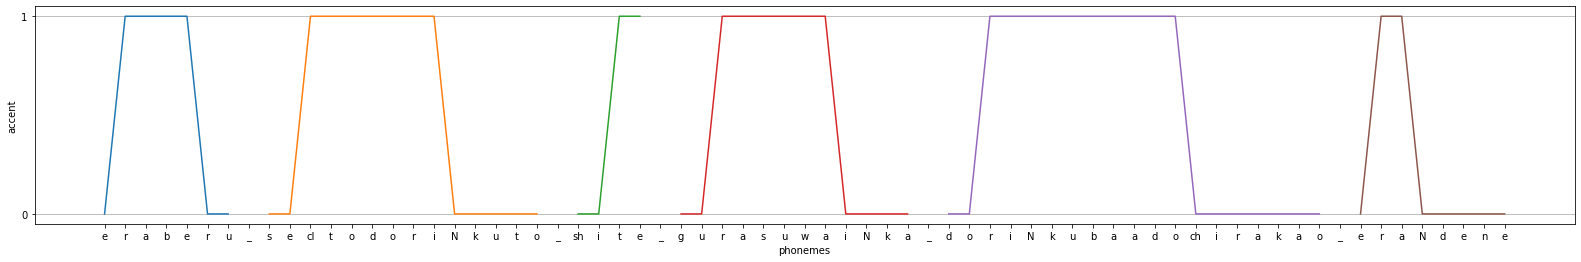

CPU times: user 768 ms, sys: 0 ns, total: 768 ms
Wall time: 770 ms


In [ ]:
#@title ■2.2 ボイス生成

#@markdown - モードを選択してください。
str_tts_mode = "Japanese Text" #@param ["Japanese Text", "Sample Text", "PP Text"]


#@markdown ----
#@markdown - **Mode: Japanese Text**
str_text = "\u9078\u3079\u308B\u30BB\u30C3\u30C8\u30C9\u30EA\u30F3\u30AF\u3068\u3057\u3066\u3001\u30B0\u30E9\u30B9\u30EF\u30A4\u30F3\u304B\u30C9\u30EA\u30F3\u30AF\u30D0\u30FC\u3069\u3061\u3089\u304B\u3092\u9078\u3093\u3067\u306D\u3002" #@param {type:"string"}

#@markdown ----
#@markdown - Mode: Sample Text
list_sample_text = list_text_WAC #@param ["list_text_ULA", "list_text_SSR", "list_text_WAC", "list_text_SSR4_4koma", "list_text_SSR6_4koma"] {type:"raw"}
int_text_number = 2 #@param {type:"slider", min:0, max:23, step:1}

#@markdown ----
#@markdown - Mode: PP Text
str_PP = "" #@param {type:"string"}



if str_tts_mode in ["Japanese Text", "Sample Text"]:
  if str_tts_mode == "Sample Text":
    str_text = list_sample_text[int_text_number]

  str_PP = text_to_pp(str_text)
  print(text_to_text(str_text))


# printing information
print(str_PP)
list_PP = str_PP.split(" ")
printPP(list_PP)
plot_accent(list_PP)

# speech systhesis
%time wav, sr = pwg_engine.tts(list_PP, is_pp=True)
IPython.display.display(Audio(wav, rate=sr))

### ■音声合成部分の説明

----
#### ○Mode
 - 以下の3つのモードを利用できます。

| Mode | Description |
|---|---|
| **Japanese Text** | 通常のモード。日本語を書くと、このみさんがお話してくれます。 |
| Sample Text | サンプル文を読み上げてもらうモード。ただし学習データも含むので注意（後述）。|
| PP Text | 発展的なモード。発音・アクセントを手動で指定できます。|

----
#### ○Mode: Sample Text
 - サンプル文章（ミリオンライブ！公式のテキスト）を用いて音声合成するモードです。

| Sample Text | Description | Number of Text | Training Data for "2500" ? | Training Data for "4000" ? |
|---|---|:---:|:---:|:---:|
| ULA | ULA編テキスト from グリマス | 22 | ○ | ○ |
| SSR | SSRフレーバーテキスト from ミリシタ | 24 | × | ○ |
| WAC | クッキング大運動会テキスト from ミリシタ | 17 | × | × |
| SSR4_4koma | [4コマ「ホワイトデーのあとで」](https://twitter.com/imasml_theater/status/1242390700756553729) | 7 | × | × |
| SSR6_4koma | [4コマ「夢の話」](https://twitter.com/imasml_theater/status/1414872477260558337) | 17 | × | × |

 - 汎化性能のテストには、WACまたは4コマを利用してください。

----
#### ○Mode: PP Text

- アクセント等を手動で修正する場合に使うモード。入力はPPラベルテキスト。
- Question: PPラベルテキストって何？
 - Answer: **調律記号付き音素列**（Phonetic and Prosodic labels）のこと。つまり、日本語を音素列に変換して、アクセント情報などを付加したもの。
 - 例: 「ウフ、はじめましてプロデューサー。」→「^ u [ f u _ h a [ j i m e m a ] sh i t e # p u [ r o dy u u s a a $」
 - 簡単に言えば、アルファベットは音素、記号はアクセントなどの付加情報を表しています。
 - 詳しくは以下を参照してください（右クリック→新しいタブで開く）。
   - K. Kurihara, N. Seiyama, and T. Kumano: "[Prosodic Features Control by Symbols as Input of Sequence-to-Sequence Acoustic Modeling for Neural TTS](https://www.jstage.jst.go.jp/article/transinf/E104.D/2/E104.D_2020EDP7104/_article)".
   - 山本龍一，高道慎之介: "[Pythonで学ぶ音声合成 機械学習実践シリーズ](https://book.impress.co.jp/books/1120101073)", pp.304--p305.
   - 山本龍一: "[ttslearn.tacotron.frontend.openjtalk.pp_symbols](https://r9y9.github.io/ttslearn/latest/generated/ttslearn.tacotron.frontend.openjtalk.pp_symbols.html)".

----

#### 【TIPS】
- **生成された音声は、ダウンロード可能です**。
  - 音声再生用のインターフェースの「︙」ボタンを押すと、ダウンロードできます。
- 生成される音声は、試行ごとに若干変化します。
  - 「プロデューサー。」と読み上げてもらうと一番わかりやすいです。
  - この現象は、Tacotron2が推論時にDropout（NN内のノードの状態を確率的に0とする手法）を行うことに起因するようです。

----
